In [2]:
import tensorflow as tf

## MNIST 数据集

![mnist](http://www.tensorfly.cn/tfdoc/images/MNIST.png)

In [3]:
import tensorflow.examples.tutorials.mnist.input_data as input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


## 模型

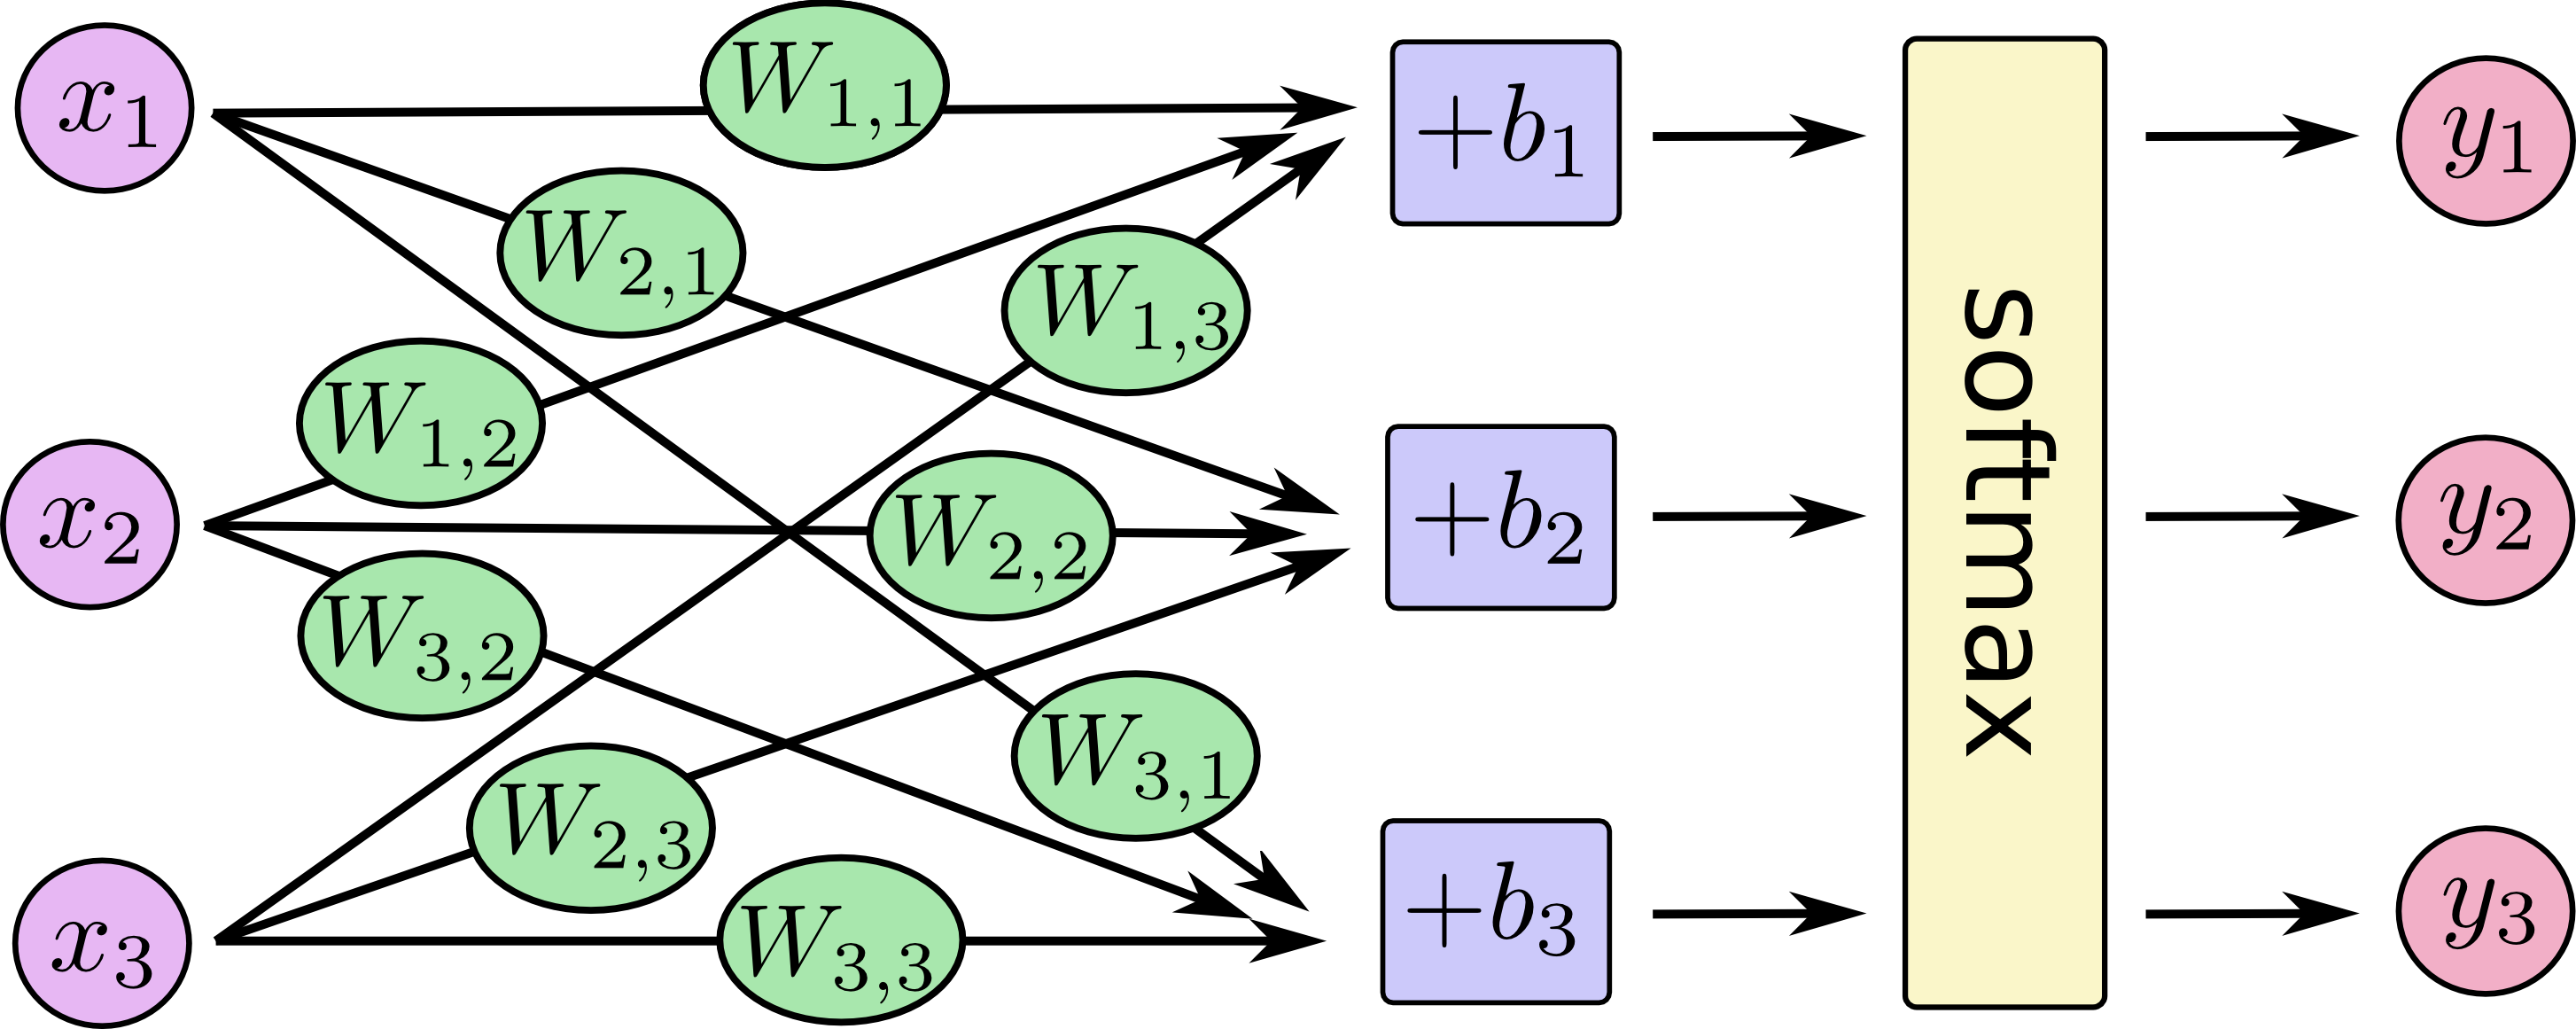

矩阵表示：

$$y=softmax(Wx+b)$$

In [4]:
x_input = tf.placeholder(tf.float32, [None, 784]) # 28 * 28
y_input = tf.placeholder(tf.float32, [None, 10])

W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

y_pred = tf.nn.softmax(tf.matmul(x_input, W) + b)

## 损失函数

使用交叉熵作为loss，交叉熵计算公式：


$$cross\_entropy=- \sum{y'\log(y)}$$

In [5]:
loss = -tf.reduce_sum(y_input * tf.log(y_pred))

## 训练模型

In [7]:
learning_rate = 0.01
train = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    for i in range(1000):
        batch_x_train, batch_y_train = mnist.train.next_batch(100)
        sess.run(train, feed_dict={x_input: batch_x_train, y_input: batch_y_train})
        if i % 50 == 0:
            print(sess.run(loss, feed_dict={x_input: batch_x_train, y_input: batch_y_train}))
            
    correct_prediction = tf.equal(tf.argmax(y_input, 1), tf.argmax(y_pred, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print('accuracy:',sess.run(accuracy,  feed_dict={x_input: mnist.test.images, y_input: mnist.test.labels}))

195.80995
25.79863
23.222704
21.146275
14.796951
28.570335
30.344818
41.12629
16.53933
22.472176
21.714981
30.106712
19.75539
11.003328
15.310965
14.968604
35.412643
12.758174
22.115925
19.99527
accuracy: 0.9075
